In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
# Import dataset 
root = "./MEIZU/processed_data/"
net_name = ["Lenet", "Squeezenet", "GoogLenet", "Alexnet", "Mobilenet"]
color = ["red", "green", "blue", "orange", "violet"]
net_name = net_name[1:2]


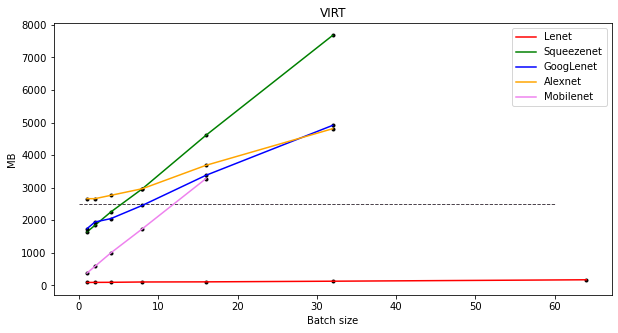

In [3]:
# VIRT
plt.figure(figsize=(10,5))
plt.title("VIRT")
plt.xlabel("Batch size")
plt.ylabel("MB")
for net in net_name:
    performance_path = root + net + "/performance_" + net + ".csv"
    performance_data = pd.read_csv(performance_path, index_col=0)
    VIRT = performance_data["VIRT"]
    batchsize = performance_data["batchsize"]
    num = min(len(batchsize),7) # 最多只输出到batchsize=64，防止图片太难看
    plt.plot(batchsize[0:num], VIRT[0:num], '.k')
    plt.plot(batchsize[0:num], VIRT[0:num], color=color[net_name.index(net)], label=net)

plt.legend()
plt.hlines(2500, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线
    


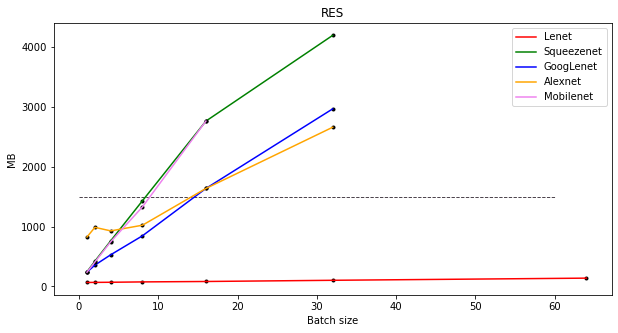

In [4]:
# RES
plt.figure(figsize=(10,5))
plt.title("RES")
plt.xlabel("Batch size")
plt.ylabel("MB")
for net in net_name:
    performance_path = root + net + "/performance_" + net + ".csv"
    performance_data = pd.read_csv(performance_path, index_col=0)
    RES = performance_data["RES"]
    batchsize = performance_data["batchsize"]
    num = min(len(batchsize),7) # 最多只输出到batchsize=64，防止图片太难看
    plt.plot(batchsize[0:num], RES[0:num], '.k')
    plt.plot(batchsize[0:num], RES[0:num], color=color[net_name.index(net)], label=net)

plt.legend()
plt.hlines(1500, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线
    


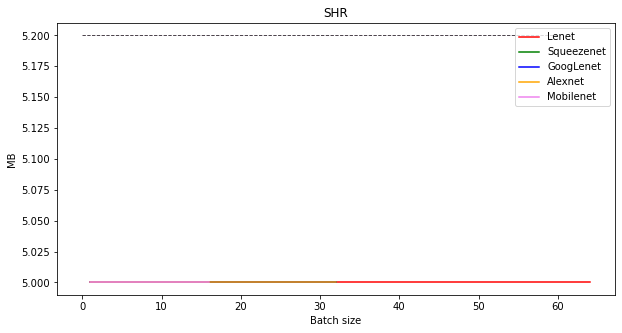

In [5]:
# SHR
plt.figure(figsize=(10,5))
plt.title("SHR")
plt.xlabel("Batch size")
plt.ylabel("MB")
for net in net_name:
    performance_path = root + net + "/performance_" + net + ".csv"
    performance_data = pd.read_csv(performance_path, index_col=0)
    SHR = performance_data["SHR"]
    batchsize = performance_data["batchsize"]
    num = min(len(batchsize),7) # 最多只输出到batchsize=64，防止图片太难看
    plt.plot(batchsize[0:num], SHR[0:num], color=color[net_name.index(net)], label=net)

plt.legend()
plt.hlines(5.2, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线
    


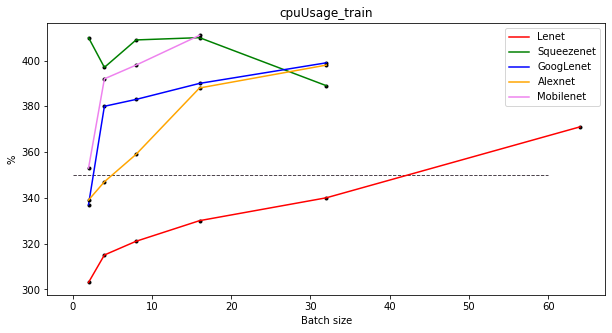

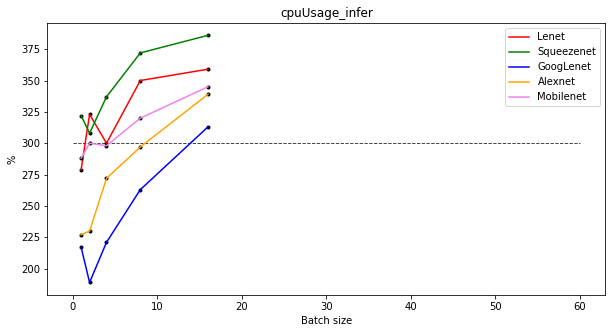

In [15]:
# cpuUsage_train
plt.figure(figsize=(10,5))
plt.title("cpuUsage_train")
plt.xlabel("Batch size")
plt.ylabel("%")
for net in net_name:
    performance_path = root + net + "/performance_" + net + ".csv"
    performance_data = pd.read_csv(performance_path, index_col=0)
    cpuUsage_train = performance_data["cpuUsage_train"]
    batchsize = performance_data["batchsize"]
    num = min(len(batchsize),7) # 最多只输出到batchsize=64，防止图片太难看
    plt.plot(batchsize[1:num], cpuUsage_train[1:num],".k")
    plt.plot(batchsize[1:num], cpuUsage_train[1:num], color=color[net_name.index(net)], label=net)

plt.legend()
plt.hlines(350, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线

# cpuUsage_infer
plt.figure(figsize=(10,5))
plt.title("cpuUsage_infer")
plt.xlabel("Batch size")
plt.ylabel("%")
for net in net_name:
    performance_path = root + net + "/performance_" + net + ".csv"
    performance_data = pd.read_csv(performance_path, index_col=0)
    cpuUsage_infer = performance_data["cpuUsage_infer"]
    batchsize = performance_data["batchsize"]
    #num = min(len(batchsize),7) # 最多只输出到batchsize= 64，防止图片太难看
    plt.plot(batchsize[0:num], cpuUsage_infer[:num],".k")
    plt.plot(batchsize[0:num], cpuUsage_infer[0:num], color=color[net_name.index(net)], label=net)

plt.legend()
plt.hlines(300, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线
    


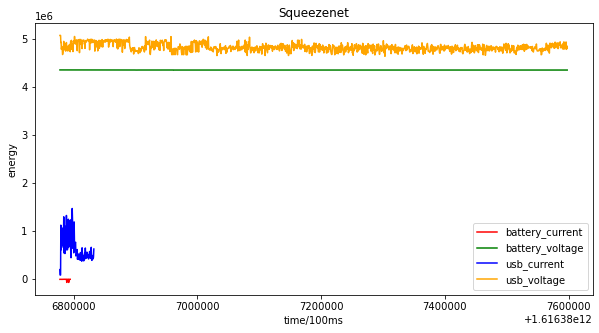

In [27]:
# energy
for net in net_name:
    plt.figure(figsize=(10,5))
    plt.title(net)
    plt.xlabel("time/100ms")
    plt.ylabel("energy")
    performance_path = root + net + "/processed_data_" + net + ".csv"
    performance_data = pd.read_csv(performance_path, index_col=0)
    battery_current = performance_data["battery_current"]
    battery_voltage = performance_data["battery_voltage"]
    usb_current = performance_data["usb_current"]
    usb_voltage = performance_data["usb_voltage"]
    time = performance_data["stamp"]
    plt.plot(time[:100], battery_current[:100],color=color[0], label="battery_current")
    plt.plot(time[:100], battery_voltage[:100],color=color[1], label="battery_voltage")
    plt.plot(time[:100], usb_current[:100],color=color[2], label="usb_current")
    plt.plot(time[:100], usb_voltage[:100],color=color[3], label="usb_voltage")
    plt.legend()
    #plt.hlines(350, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线

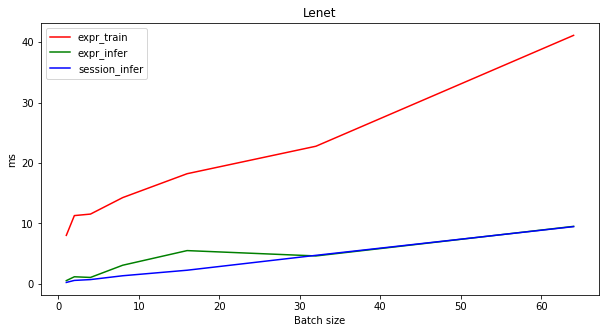

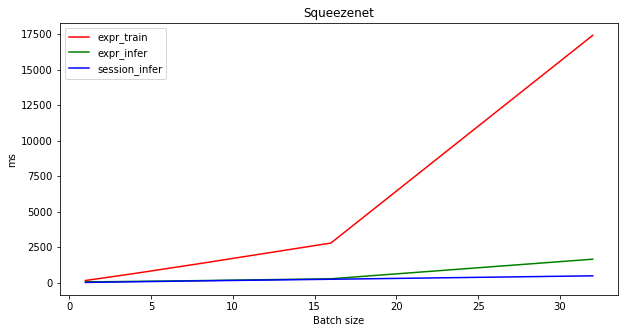

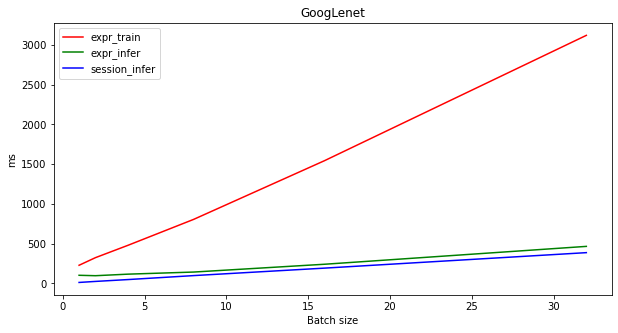

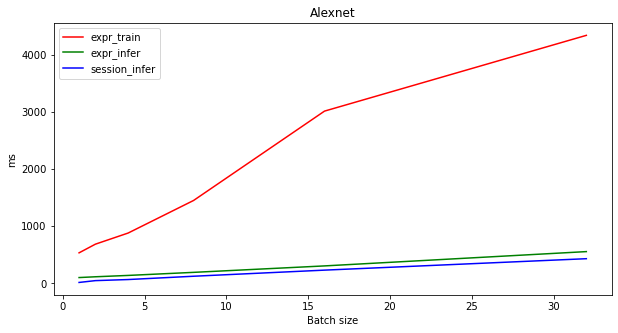

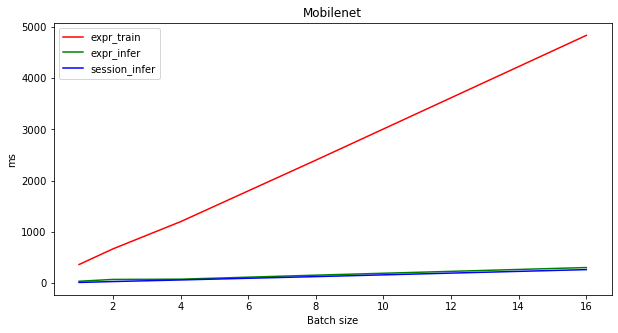

In [13]:
# time
for net in net_name:
    plt.figure(figsize=(10,5))
    plt.title(net)
    plt.xlabel("Batch size")
    plt.ylabel("ms")
    time_path = root + net + "/time_table_" + net + ".csv"
    time_data = pd.read_csv(time_path, index_col=0)
    expr_train = time_data["expr_train"]
    expr_infer = time_data["expr_infer"]
    session_infer = time_data["session_infer"]

    batchsize = time_data["batchsize"]

    plt.plot(batchsize, expr_train, color=color[0], label="expr_train")
    plt.plot(batchsize, expr_infer, color=color[1], label="expr_infer")
    plt.plot(batchsize, session_infer, color=color[2], label="session_infer")

    plt.legend()
    # plt.hlines(300, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线



    

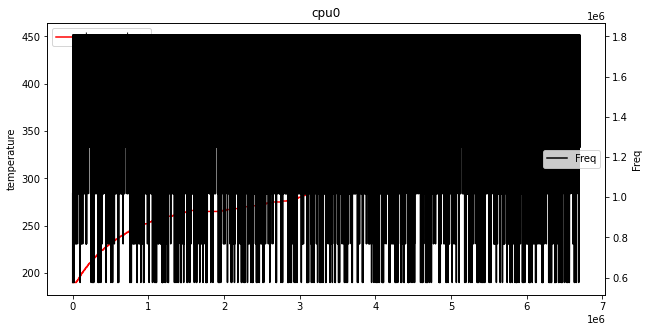

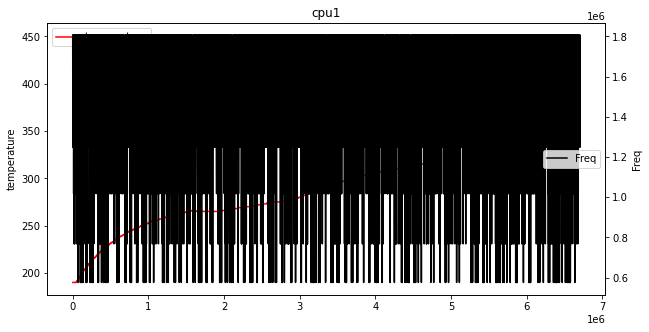

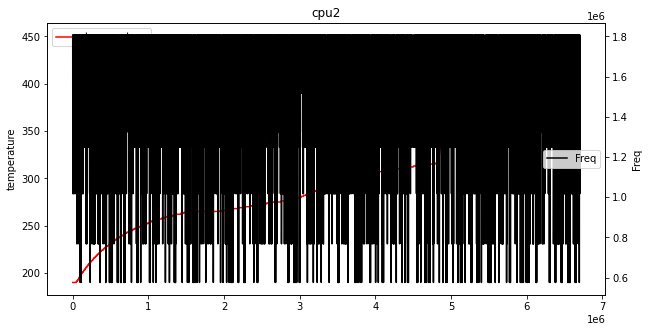

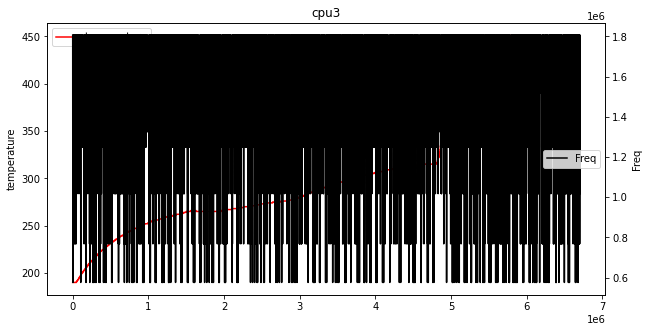

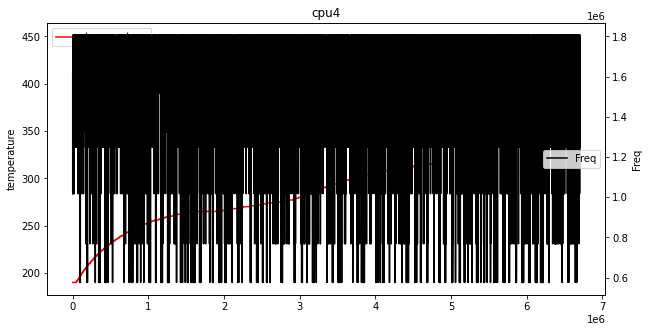

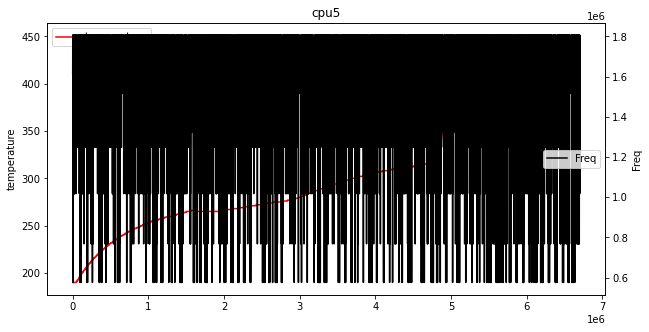

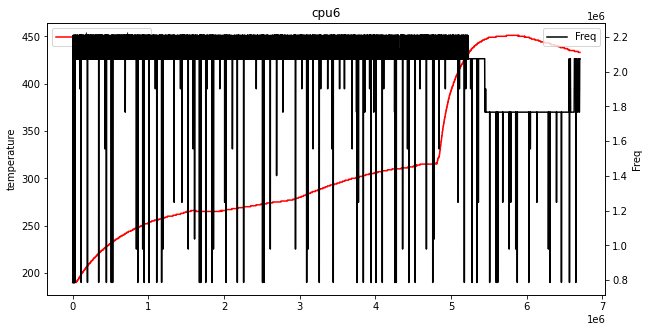

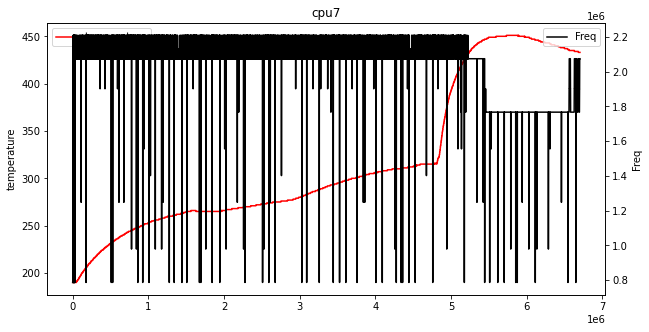

In [9]:
# Frequence-temperature
attributes= ["cpu0", "cpu1", "cpu2", "cpu3", "cpu4", "cpu5", "cpu6", "cpu7"]

freq_path = "./freq_data.csv"
freq_data = pd.read_csv(freq_path, index_col=0)

x = freq_data["stamp"]
for cpu in attributes:
    y1 = freq_data["temperature"]
    y2 = freq_data[cpu]

    fig = plt.figure(figsize=(10,5))
    plt.title("cpu")

    ax1 = fig.add_subplot(111)
    ax1.plot(x, y1, color="r", label="temperature")
    ax1.set_ylabel('temperature')
    ax1.set_title(cpu)
    plt.legend()
    
    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(x, y2, 'r', color="k", label="Freq")
    ax2.set_ylabel('Freq')
    ax2.set_xlabel('time/ms')

    plt.legend()
    #plt.hlines(1500, 0.001, 60, linestyles='dashed',linewidth=0.9,colors='#3C323C') # 画水平虚线
    

    




In [10]:
freq_path = "./freq_data.csv"
freq_data = pd.read_csv(freq_path, index_col=0)

In [11]:
freq_data

,stamp,temperature,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
1,0,190,1017600,1804800,1804800,1804800,1612800,1612800,787200,787200
2,253,190,1804800,1708800,1804800,1708800,1804800,1804800,787200,787200
3,473,190,576000,1804800,1516800,1248000,1017600,1804800,787200,787200
4,731,190,1516800,1804800,1804800,1804800,1804800,1804800,787200,787200
5,955,190,1804800,1516800,1248000,1017600,1804800,1804800,787200,787200
...,...,...,...,...,...,...,...,...,...,...
28039,6703246,433,1804800,1804800,1804800,1804800,1804800,1804800,2073600,2073600
28040,6703493,433,1248000,1248000,1804800,1804800,1804800,1804800,2073600,2073600
28041,6703723,433,1804800,1804800,1804800,1804800,1804800,1804800,2073600,2073600
28042,6703973,433,1248000,1804800,1804800,1804800,1804800,1804800,2073600,2073600
